In [130]:
# Trinidad Marroquin
# qsq707

## Lab 4B

Lab 4 consists of two exercises on reading in data from external CSV and JSON files into Pandas DataFrames.

### Tasks

In this exercise, you will analyze in 2022 data on FIFA soccer players' data. You will read in these data in the ```fifa_22.csv``` CSV file data into a Pandas dataframe. This file contains information about soccer clubs from 2022. The tasks are:

1. Clean the data
2. First analysis - Overall rating versus wage
3. Second analysis - Average overall players rating per club
4. Third analysis - Distribution of wages in clubs with the best 10 average overall ratings

More information is provided below on each of these tasks. 

#### Clean the Data

Read the ```fifa_22.csv``` capturing only the the following columns into a Pandas dataframe:
- ID
- Overall player rating
- Wage
- Club

Remove any player who does not belong to a club and any player who makes 0 Euros.

#### First Analysis

Investigate the relationship between a player's overall rating compared to their wage. Plot this data as a scatterplot with the x axis representing the rating and the y axis representing the wage.

#### Second Analysis

Investigate the data based on the club in terms of average overall rating of all players in that club. Plot these data as a bar graph for the top 10 clubs in terms of average overall rating. The x axis will be the club. The y axis will be the average overall in <strong>descending</strong> order, which will help you determine the highest valued teams in terms of their players. 

This task will require you to group the ```DataFrame``` by ```Club```. You may also need to create a new ```DataFrame``` for to create this plot. 

#### Third Analysis

Investigate the distribution of salaries for the top 10 clubs in terms of average overall rating. 
You may need to create a new ```DataFrame``` to create this plot. Plot these data as a boxplot to show the distribution of data. The x axis will be the club while the y axis will be the wage. 

This task will require you to group the ```DataFrame``` by ```Club```. You may also need to create a new ```DataFrame``` for to create this plot. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Each of the tasks below will require you to work with and use modified versions of
# the original DataFrames

In [7]:
# Task 1: Read the fifa_22.csv file with specific columns and clean the data
def read_and_clean_fifa_data(file_path):
    try:
        # Read the CSV file with only the specified columns
        df = pd.read_csv(file_path, usecols=['sofifa_id', 'overall', 'wage_eur', 'club_name'])
        print(f"Successfully read '{file_path}' with selected columns.")

        # Display a sample of the data
        print("\nInitial data sample:")
        print(df.head())

        # Remove any players who do not belong to a club or have a wage of 0 Euros
        cleaned_df = df.dropna(subset=['club_name']).copy()  # Drop rows where Club is NaN and use .copy() to avoid chained assignment issues
        
        # Convert Wage to numeric values
        cleaned_df['wage_eur'] = cleaned_df['wage_eur'].replace('[€K]', '', regex=True).astype(float)

        # Remove players who make 0 Euros
        cleaned_df = cleaned_df[cleaned_df['wage_eur'] > 0]

        # Display a sample of the cleaned data
        print("\nCleaned data sample:")
        print(cleaned_df.head())

        return cleaned_df

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{file_path}' is empty or all rows are missing.")
    except pd.errors.ParserError:
        print(f"Error: Failed to parse the file '{file_path}'. Please check if it is a valid CSV file.")
    except ValueError as e:
        print(f"ValueError: An issue with data conversion occurred: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
    finally:
        print(f"Finished attempting to read and clean '{file_path}'.")

# Read and clean the data from fifa_22.csv
fifa_data_cleaned = read_and_clean_fifa_data('fifa_22.csv')

# Display the final cleaned data
if fifa_data_cleaned is not None and not fifa_data_cleaned.empty:
    print("\nFinal Cleaned FIFA DataFrame:")
    print(fifa_data_cleaned.head())




Successfully read 'fifa_22.csv' with selected columns.

Initial data sample:
   sofifa_id  overall  wage_eur            club_name
0     158023       93  320000.0  Paris Saint-Germain
1     188545       92  270000.0    FC Bayern München
2      20801       91  270000.0    Manchester United
3     190871       91  270000.0  Paris Saint-Germain
4     192985       91  350000.0      Manchester City

Cleaned data sample:
   sofifa_id  overall  wage_eur            club_name
0     158023       93  320000.0  Paris Saint-Germain
1     188545       92  270000.0    FC Bayern München
2      20801       91  270000.0    Manchester United
3     190871       91  270000.0  Paris Saint-Germain
4     192985       91  350000.0      Manchester City
Finished attempting to read and clean 'fifa_22.csv'.

Final Cleaned FIFA DataFrame:
   sofifa_id  overall  wage_eur            club_name
0     158023       93  320000.0  Paris Saint-Germain
1     188545       92  270000.0    FC Bayern München
2      20801       91 

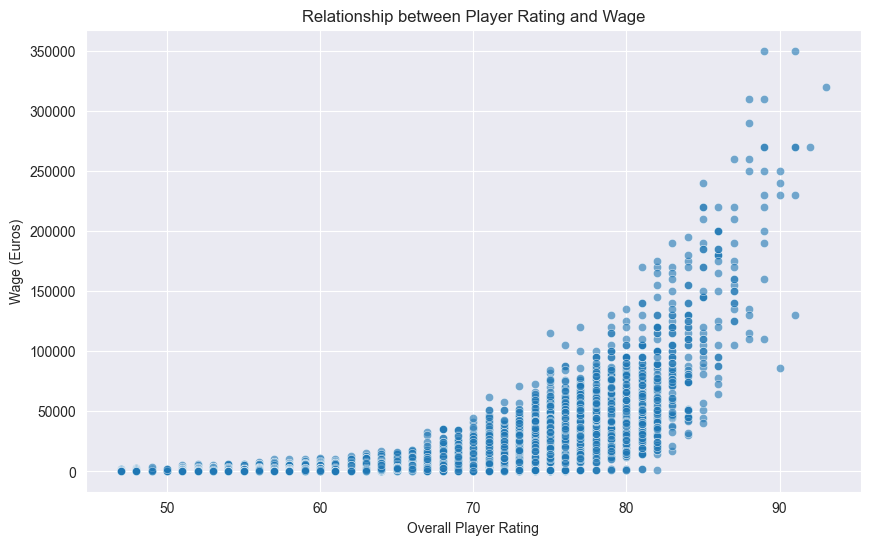

Finished attempting to create the scatter plot.


In [9]:
# Task 2: Plotting a scatterplot to investigate the relationship between a player's rating and wage
def plot_rating_vs_wage(df):
    try:
        # Check if the DataFrame is not empty
        if df is None or df.empty:
            print("Error: The provided DataFrame is empty or not loaded correctly.")
            return
        
        # Create a scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x='overall', y='wage_eur', alpha=0.6)

        # Adding titles and labels
        plt.title('Relationship between Player Rating and Wage')
        plt.xlabel('Overall Player Rating')
        plt.ylabel('Wage (Euros)')
        plt.grid(True)

        # Show the plot
        plt.show()
    
    except KeyError as e:
        print(f"KeyError: One of the required columns is missing: {e}")
    except ValueError as e:
        print(f"ValueError: There was an issue with the values used for plotting: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while creating the scatter plot: {e}")
    finally:
        print("Finished attempting to create the scatter plot.")

# Plot the relationship using the cleaned FIFA data
plot_rating_vs_wage(fifa_data_cleaned)



Data for Top 10 Clubs by Average Overall Rating:
   sofifa_id  overall  wage_eur            club_name
0     158023       93  320000.0  Paris Saint-Germain
1     188545       92  270000.0    FC Bayern München
2      20801       91  270000.0    Manchester United
3     190871       91  270000.0  Paris Saint-Germain
6     231747       91  230000.0  Paris Saint-Germain


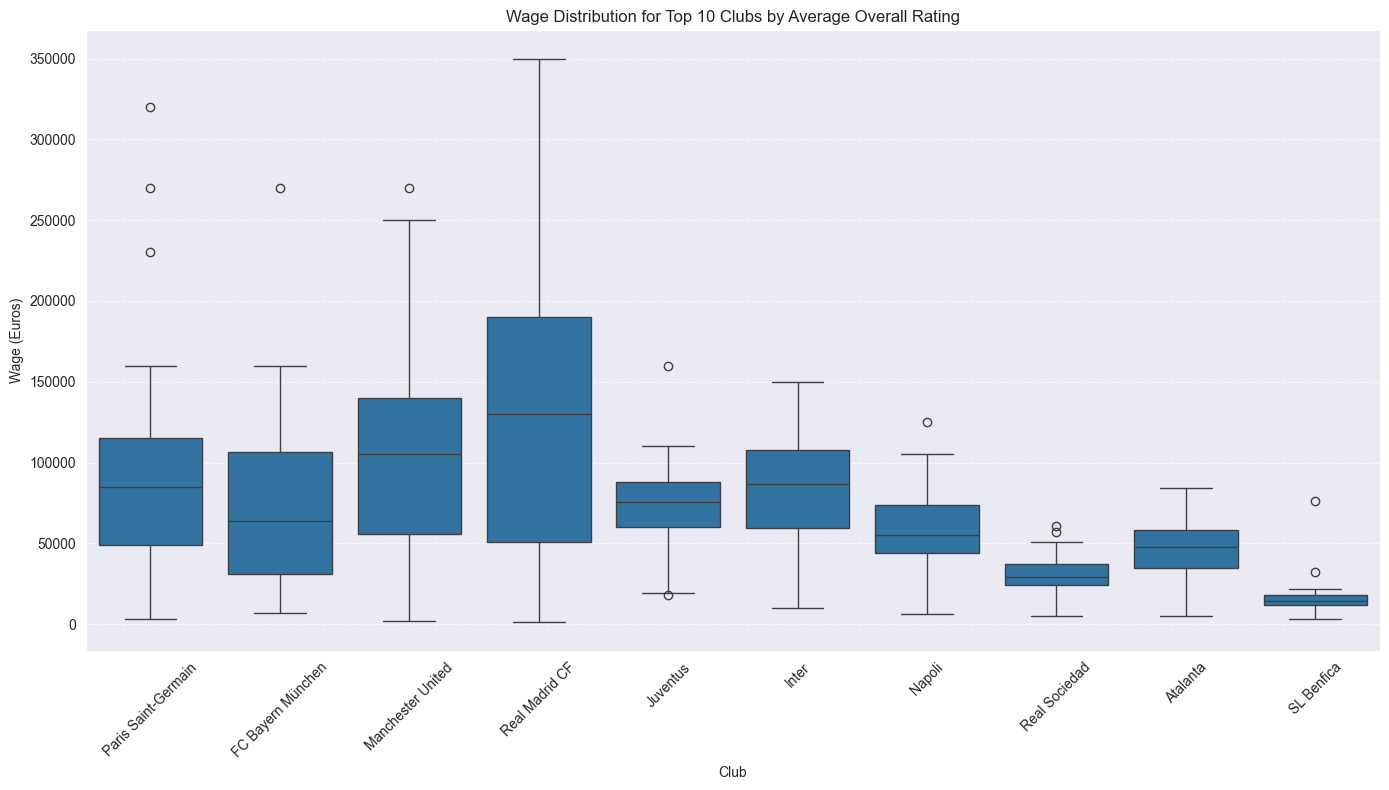

Finished attempting to create the boxplot.


In [10]:
# Task 3: Investigate the distribution of salaries for the top 10 clubs based on average overall rating
def plot_top_clubs_wage_distribution(df):
    try:
        # Check if the DataFrame is not empty
        if df is None or df.empty:
            print("Error: The provided DataFrame is empty or not loaded correctly.")
            return
        
        # Step 1: Group by club_name and calculate the average overall rating
        club_avg_rating = df.groupby('club_name')['overall'].mean().reset_index()
        
        # Step 2: Identify the top 10 clubs by average overall rating
        top_10_clubs = club_avg_rating.nlargest(10, 'overall')['club_name']

        # Step 3: Filter the original DataFrame to include only players from these top 10 clubs
        top_clubs_df = df[df['club_name'].isin(top_10_clubs)].copy()
        
        # Display the filtered DataFrame to ensure correctness
        print("\nData for Top 10 Clubs by Average Overall Rating:")
        print(top_clubs_df.head())

        # Step 4: Create a boxplot for the distribution of wages for the top 10 clubs
        plt.figure(figsize=(14, 8))
        sns.boxplot(data=top_clubs_df, x='club_name', y='wage_eur')
        
        # Adding titles and labels
        plt.title('Wage Distribution for Top 10 Clubs by Average Overall Rating')
        plt.xlabel('Club')
        plt.ylabel('Wage (Euros)')
        plt.xticks(rotation=45)
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # Show the plot
        plt.tight_layout()
        plt.show()

    except KeyError as e:
        print(f"KeyError: One of the required columns is missing: {e}")
    except ValueError as e:
        print(f"ValueError: An issue with the values used for plotting: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while creating the boxplot: {e}")
    finally:
        print("Finished attempting to create the boxplot.")

# Run the function using the cleaned FIFA data
plot_top_clubs_wage_distribution(fifa_data_cleaned)


In [11]:
# For Question 1: Calculate the correlation between wage and rating
def calculate_correlation(df, col1, col2):
    try:
        # Check if the DataFrame is not empty
        if df is None or df.empty:
            print("Error: The provided DataFrame is empty or not loaded correctly.")
            return None
        
        # Check if the specified columns exist in the DataFrame
        if col1 not in df.columns or col2 not in df.columns:
            print(f"Error: One or both columns '{col1}' and '{col2}' are missing in the DataFrame.")
            return None
        
        # Calculate the correlation coefficient between the two columns
        correlation = df[col1].corr(df[col2])
        print(f"Correlation between {col1} and {col2}: {correlation:.2f}")
        return correlation
    
    except TypeError as e:
        print(f"TypeError: There was an issue with the data types in the correlation calculation: {e}")
    except ValueError as e:
        print(f"ValueError: An issue occurred during the correlation calculation: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while calculating the correlation: {e}")
    finally:
        print(f"Finished attempting to calculate the correlation between '{col1}' and '{col2}'.")

# Calculate the correlation between 'overall' and 'wage_eur' using the enhanced function
calculate_correlation(fifa_data_cleaned, 'overall', 'wage_eur')


Correlation between overall and wage_eur: 0.60
Finished attempting to calculate the correlation between 'overall' and 'wage_eur'.


np.float64(0.6017635143614598)


Top 3 Clubs by Average Overall Rating:
               club_name    overall
368             Juventus  79.961538
470  Paris Saint-Germain  79.454545
358                Inter  78.857143


C:\Users\Trinidad\AppData\Local\Temp\ipykernel_21712\316109646.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_clubs, x='club_name', y='overall', palette="viridis")


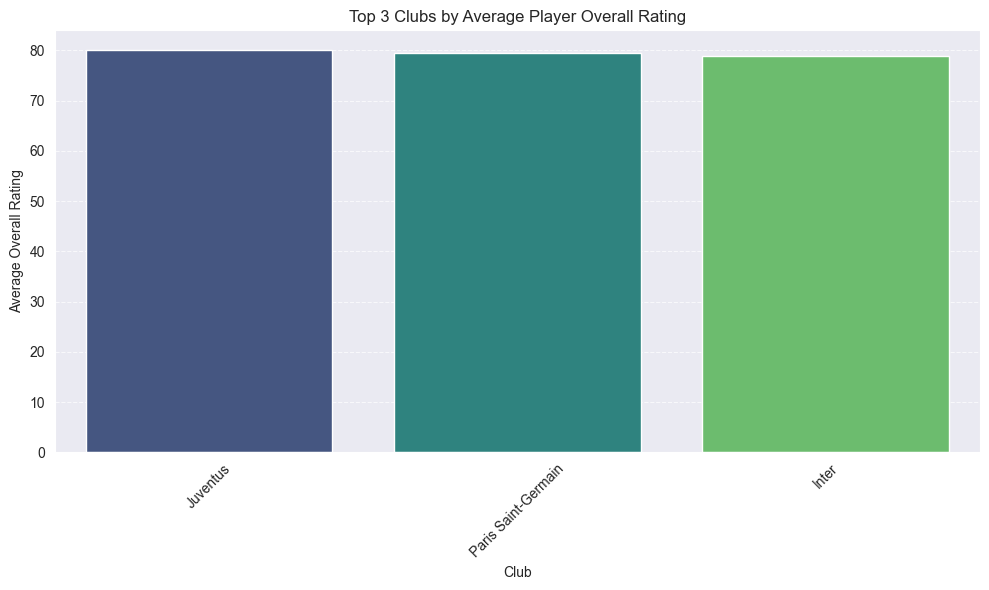

Finished attempting to identify and plot the top clubs by average overall rating.


In [12]:
# Question 2: Identify clubs with the highest average player overall ratings and create a barplot
def plot_top_clubs_by_rating(df, top_n=3):
    try:
        # Check if the DataFrame is not empty
        if df is None or df.empty:
            print("Error: The provided DataFrame is empty or not loaded correctly.")
            return
        
        # Step 1: Group by 'club_name' and calculate the average 'overall' rating
        club_avg_rating = df.groupby('club_name')['overall'].mean().reset_index()
        
        # Step 2: Identify the top N clubs with the highest average overall rating
        top_clubs = club_avg_rating.nlargest(top_n, 'overall')
        
        # Display the top clubs
        print(f"\nTop {top_n} Clubs by Average Overall Rating:")
        print(top_clubs)
        
        # Step 3: Plot the top clubs using a barplot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=top_clubs, x='club_name', y='overall', palette="viridis")
        
        # Adding titles and labels
        plt.title(f'Top {top_n} Clubs by Average Player Overall Rating')
        plt.xlabel('Club')
        plt.ylabel('Average Overall Rating')
        plt.xticks(rotation=45)
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # Show the plot
        plt.tight_layout()
        plt.show()
        
        return top_clubs
    
    except KeyError as e:
        print(f"KeyError: One of the required columns is missing: {e}")
    except ValueError as e:
        print(f"ValueError: An issue with the values used for plotting: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while creating the barplot: {e}")
    finally:
        print("Finished attempting to identify and plot the top clubs by average overall rating.")

# Identify and plot the top 3 clubs by average overall rating
top_clubs_df = plot_top_clubs_by_rating(fifa_data_cleaned, top_n=3)


In [15]:
# Question 3:  Calculate the IQR and Standard Deviation of wages for each club
def analyze_wage_distribution(df):
    try:
        # Check if the DataFrame is not empty
        if df is None or df.empty:
            print("Error: The provided DataFrame is empty or not loaded correctly.")
            return None
        
        # Group by club_name and calculate wage statistics
        club_wage_stats = df.groupby('club_name')['wage_eur'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
        
        # Calculate IQR (Interquartile Range)
        club_wage_stats['iqr'] = df.groupby('club_name')['wage_eur'].quantile(0.75).values - df.groupby('club_name')['wage_eur'].quantile(0.25).values
        
        # Identify clubs with the smallest and largest wage distribution using the IQR
        club_with_smallest_distribution = club_wage_stats.nsmallest(1, 'iqr')
        club_with_largest_distribution = club_wage_stats.nlargest(1, 'iqr')
        
        print("\nClub with the smallest wage distribution:")
        print(club_with_smallest_distribution)
        
        print("\nClub with the largest wage distribution:")
        print(club_with_largest_distribution)
        
        return club_with_largest_distribution, club_with_smallest_distribution
        
    except KeyError as e:
        print(f"KeyError: One of the required columns is missing: {e}")
    except ValueError as e:
        print(f"ValueError: An issue occurred during the analysis: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while analyzing wage distribution: {e}")
    finally:
        print("Finished analyzing wage distribution among clubs.")

# Analyze the wage distribution using the cleaned FIFA data
club_with_largest_distribution, club_with_smallest_distribution = analyze_wage_distribution(fifa_data_cleaned)

# Detect outliers based on the 1.5 x IQR Rule
def identify_outliers(df, club_name):
    try:
        # Filter data for the specific club
        club_data = df[df['club_name'] == club_name]
        
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for wages
        Q1 = club_data['wage_eur'].quantile(0.25)
        Q3 = club_data['wage_eur'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = club_data[(club_data['wage_eur'] < lower_bound) | (club_data['wage_eur'] > upper_bound)]
        
        print(f"\nOutliers for {club_name}:")
        print(outliers[['sofifa_id', 'overall', 'wage_eur', 'club_name']])
        
        return outliers
    
    except KeyError as e:
        print(f"KeyError: One of the required columns is missing: {e}")
    except ValueError as e:
        print(f"ValueError: An issue occurred during the outlier detection: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while detecting outliers: {e}")
    finally:
        print(f"Finished identifying outliers for {club_name}.")

# Identify outliers for clubs with the largest and smallest distribution
if not club_with_largest_distribution.empty:
    largest_club_name = club_with_largest_distribution.iloc[0]['club_name']
    outliers_largest_club = identify_outliers(fifa_data_cleaned, largest_club_name)

if not club_with_smallest_distribution.empty:
    smallest_club_name = club_with_smallest_distribution.iloc[0]['club_name']
    outliers_smallest_club = identify_outliers(fifa_data_cleaned, smallest_club_name)


Club with the smallest wage distribution:
          club_name   mean  median       std    min    max  iqr
8  12 de Octubre FC  507.5   500.0  33.54102  500.0  650.0  0.0

Club with the largest wage distribution:
           club_name      mean    median           std    min       max  \
411  Manchester City  112825.0  112500.0  93117.095898  700.0  350000.0   

          iqr  
411  167750.0  
Finished analyzing wage distribution among clubs.

Outliers for Manchester City:
Empty DataFrame
Columns: [sofifa_id, overall, wage_eur, club_name]
Index: []
Finished identifying outliers for Manchester City.

Outliers for 12 de Octubre FC:
      sofifa_id  overall  wage_eur         club_name
4145     216530       71     650.0  12 de Octubre FC
Finished identifying outliers for 12 de Octubre FC.


## Questions

1. What is the relationship between a player's Overall rating compared to their Wage? Is there any significant relationship between a player's rating and their wage?

2. Which clubs has the highest player Overall ratings on average? Find some information on one of the top three clubs in the barplot and report any information about the success of those clubs around 2022. 

3. Which clubs have the smallest and largest distribution in terms of wages? Are there any extreme outliers in this data? What information can you find about those outliers in terms of how extreme their wages are compared to the rest of the club?

## Answers

Enter your responses here

Question 1:  Since "Correlation between overall and wage_eur is 0.60", there is a moderate correlation between overall player rating and wage.  This indicates that there are other factors affecting wage. 

Question 2:  The top three clubs for the 2021-2022 Season are PSG, Junentus, and Inter

PSG:  Won the Ligue 1 title for the 2021-2022 season, marking their 10th league title. They finished 15 points clear of the second-placed team, showcasing their dominance in French football.  The club has consistently been a top contender in Ligue 1, largely due to the quality and overall rating of their star players.  Reference:  https://ligue1.com/

Juventus: Finished 4th in Serie A during the 2021-2022 season, with a total of 70 points. This was below their usual high standards, as they have been dominant in Italian football, winning nine consecutive league titles from 2011 to 2020.  Reference:  https://www.legaseriea.it/it

Inter Milan: Finished 2nd in Serie A with 84 points, narrowly missing out on the title by just 2 points to AC Milan. It was a strong season for Inter, who had won the league in the previous 2020-2021 season.  Reference:  https://www.legaseriea.it/it

Question 3:  Manchester City has the largest Wage Distribution.  There are no outliers here suggesting that all player wages fall within a "reasonable" range based on IQR calculation (1.5 x IQR rule).  The club, 12 de Octubre FC, has the smallest wage distribution and does have an outlier suggesting that with even with modest budgets, wages may not be evenly distributed.